In [28]:
from sys import path_hooks

import numpy as np
from matplotlib import pyplot as plt


def process_img_for_plot(img):
    # log处理
    imgScale = np.log10(img + 1e-30)
    # 获取实际的值
    imgValid = imgScale[img != 0]
    # 使图像分布在0-255
    p10 = np.percentile(imgValid, 10)
    m = 255 / (imgValid.max() - p10)
    b = -p10 * m
    # 去除最小值
    img = imgScale * m + b
    img[img < 0] = 0
    return img


PRODUCT_ID = ["S_01926401","S_03554901","S_03821902","S_04365901","S_04725901","S_05464301"]
# result_path = 'data/result/' + PRODUCT_ID + '/'

In [35]:
import os
for product_id in PRODUCT_ID:
    result_path = 'data/result/' + product_id + '/'
    rgram = np.load(result_path + 'rgram_data.npy')
    rgram[np.isnan(rgram)] = 0
    rgram_vv = np.load(result_path + 'rgram_vv.npy')
    rgram_hh = np.load(result_path + 'rgram_hh.npy')
    root_path = "E:/PycharmProjects/mars_sim_web/method/sharad_sim/data/Ye/" + product_id
    if not os.path.exists(root_path):
        os.mkdir(root_path)
    plt.imshow(process_img_for_plot(rgram_vv), cmap='Blues')
    plt.axis('off')
    path = "data/Ye/" + product_id + "/" + product_id
    path_vv = path + "_vv.png"
    plt.savefig(path_vv, dpi=1000, bbox_inches='tight')
    plt.close()
    path_hh = path + "_hh.png"
    plt.imshow(process_img_for_plot(rgram_hh), cmap='Blues')
    plt.axis('off')
    plt.savefig(path_hh, dpi=1000, bbox_inches='tight')
    plt.close()
    plt.imshow(process_img_for_plot(rgram), cmap='Blues')
    plt.axis('off')
    path_rgram = path + "_rgram.png"
    plt.savefig(path_rgram, dpi=1000, bbox_inches='tight')
    plt.close()

(-0.5, 4499.5, 3599.5, -0.5)

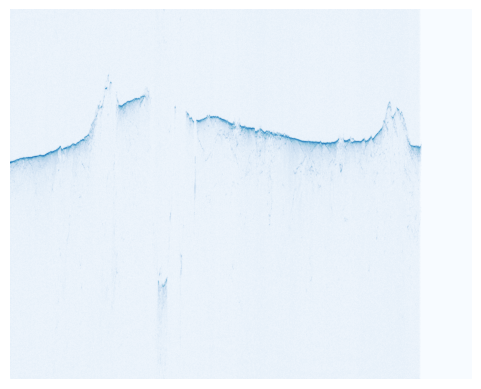